# ESERCIZI 2

In [51]:
#2.1
#QUESTO PROGRAMMA E' ANCORA PIU' GENERALE PUO' FARE LA CONVERSIONE DI QUALSIASI BASE IN QUALSIASI BASE PURCHE' <= BASE 16

#di default prendo e mi porto il numero a decimale (sia che parta da 2 o 16, oppure che sia da in 10)
#poi da 10 mi sposto alla base finale richiesta

#10 is treated as a number
#2, 16 are treated as string

a = list('0123456789ABCDEF')
dict1 = {x:i for i,x in enumerate(a)} # useful for 2 / 16 ----> 10
dict2 = {i:x for i,x in enumerate(a)} # useful for 10 ----> 2 / 16
def to_decimal(value,base_from): # output in decimal  2--->10 or 16--->10
    value = str(value).upper()
    data = list(value)
    data = data[::-1]
    sum = 0
    for i,x in enumerate(data):
        if dict1[x] >= base_from: print('INPUT ERROR, BASE NOT CORRECT')
        sum += dict1[x] * base_from ** i    
    return sum

def from_decimal(value,base_to): # 10--->2 or 10--->16, output is in string
    if value == 0:
        return '0'
    else:
        res = ''
        while(value>0):
            res = dict2[ value % base_to ] + res 
            value = value // base_to                   
        return res

def convert(value,base_from,base_to):
    if base_from != 10:
        value=to_decimal(value,base_from) #the value is convert to decimal
    if base_to == 10:
        return value
    else: 
        return from_decimal(value,base_to) #before the value is always converted in base 10

#origin='101010110010'
#origin=2738
origin='AB2'
base_origin=16
base_arrival=16
#y = to_decimal(origin,base_origin)
#print( y )
#print( from_decimal( y,base_arrival ) ) 
print(convert(origin,base_origin,base_arrival))

AB2


In [2]:
#2.5
from math import sqrt
a,b,c = 0.001,1000.,0.001

#soluzioni sono -0.0000010000 and -1000000.00 , ossia -(1e-6) e -(1e6)
#ax^2+bx+c = 0, ossia (1e-3)x^2 + (1e3)x + (1e-3) = 0

def f(x,a=a,b=b,c=c): 
    return a*x*x+b*x+c
def sqrt_delta(a=a,b=b,c=c):
    delta=b*b-4*a*c
    if delta>= 0. :
        return(sqrt(delta))
    else:
        print('MATH ERROR, negative square root')
def sol1(a=a,b=b,c=c): 
    return [(-b+sqrt_delta())/(2*a) , (-b-sqrt_delta())/(2*a)]
def sol2(a=a,b=b,c=c): 
    return [(4*a*c)/(2*a*(-b-sqrt_delta())) , (4*a*c)/(2*a*(-b+sqrt_delta()))]

def best_sol(a=a,b=b,c=c):
    sol=[]
    for i,j in zip( sol1(),sol2() ):
        if abs(f(i)) <= abs(f(j)): sol.append(i)
        else: sol.append(j)
    return sol

x1,x2=sol1()
print(f'Solution of {a}x*x+{b}x+{c}=0 using standard formula are: \n {x1:.10f} and {x2:.2f} \n')
x1,x2=sol2()
print(f'Solution of {a}x*x+{b}x+{c}=0 using unrationalized formula are: \n {x1:.10f} and {x2:.2f} \n')

print('The computational issues are due to the fact that sqrt(delta) in nearly 1000, \
so equal to b so in the formula it happens that there is a division between two small numbers anche the computer doesn\'t handle it properly.\n')

x1,x2=best_sol()
print(f'The best computational solution of {a}x*x+{b}x+{c}=0 are: \n {x1:.10f} and {x2:.2f} \n')

Solution of 0.001x*x+1000.0x+0.001=0 using standard formula are: 
 -0.0000010000 and -1000000.00 

Solution of 0.001x*x+1000.0x+0.001=0 using unrationalized formula are: 
 -0.0000010000 and -1000010.58 

The computational issues are due to the fact that sqrt(delta) in nearly 1000, so equal to b so in the formula it happens that there is a division between two small numbers anche the computer doesn't handle it properly.

The best computational solution of 0.001x*x+1000.0x+0.001=0 are: 
 -0.0000010000 and -1000000.00 



The derivative using the limit definition with delta 0.01 is equal to:
1.01000000

The derivative using the limit definition with delta 0.0001 is equal to:
1.00010000

The derivative using the limit definition with delta 1e-06 is equal to:
1.00000100

The derivative using the limit definition with delta 1e-08 is equal to:
1.00000000

The derivative using the limit definition with delta 1e-10 is equal to:
1.00000008

The derivative using the limit definition with delta 1e-12 is equal to:
1.00008890

The derivative using the limit definition with delta 1e-14 is equal to:
0.99920072

While the derivative analitic value is 1

Not same results due to computational factors, not an easy calculation cause it arises from a divsion of two small numbers


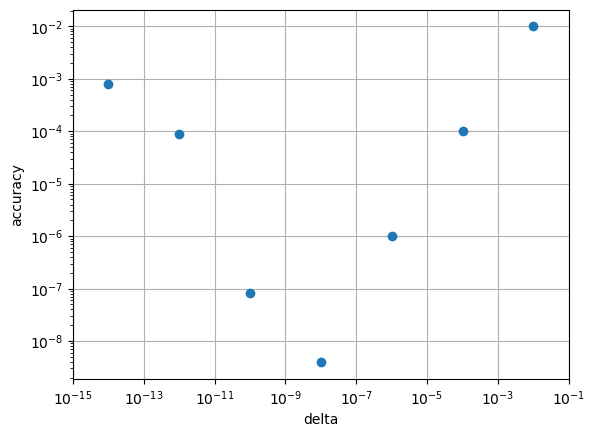

In [1]:
#2.6
import matplotlib.pyplot as plt
import numpy as np
def f(x=1): return x*(x-1)
def f_prime(x=1): return 2*x-1
def f_der_lim(x,d): return ( f(x+d) - f(x) ) / d
delta = [ 10**(-2*i) for i in range(1,8) ]
from_der = np.array( [ f_der_lim(1,d) for d in delta ] )
for d,ris in zip(delta,from_der): print(f'The derivative using the limit definition with delta {d} is equal to:\n{ris:.8f}\n')
print(f'While the derivative analitic value is {f_prime(x=1)}\n')
print('Not same results due to computational factors, not an easy calculation cause it arises from a divsion of two small numbers')
plt.plot(delta,abs(from_der-1),'o')
plt.ylabel('accuracy')
plt.xlabel('delta')
plt.xscale('log')
plt.yscale('log')
plt.xlim(10**(-15),10**(-1))
plt.grid(True)
plt.show()

In [5]:
#2.7
from math import pi
from math import sqrt
import numpy as np
import time
#N=100
def f(x): 
    return sqrt(1-x*x)
def integr(N):
    bins = np.linspace(-1,1,N+1) #using this trick to center the xi in the bins, see below
    a = np.array( [ f(x) for x in (bins[1:]+bins[:-1])/2 ] )
    return a.sum()*2/N
def time_integr(N):
    start=time.time()
    integr(N)
    end=time.time()
    return end-start
print(f"The integral comutationally with Riemann methon using N={100} is: {integr(100)}")
print(f'The analitical result of the integral is {pi/2}')
def max_iteraz(seconds):
    N=100
    while(time_integr(N)<seconds):
        N = N * 2
    return int(N / 2) #sennò il programma ti da errore che lo interpreta come un float e non funzina più np.linspace(a,b,N)
N_1_sec = max_iteraz(1)
N_20_sec = max_iteraz(20)
print(f'Number of iterations are {N_1_sec} to mantain Riemann method for integral below 1 second with result {integr(N_1_sec)}')
print(f'Number of iterations are {N_20_sec} to mantain Riemann method for integral below 20 second with result {integr(N_20_sec)}')

The integral comutationally with Riemann methon using N=100 is: 1.571282776229796
The analitical result of the integral is 1.5707963267948966
Number of iterations are 409600 to mantain Riemann method for integral below 1 second with result 1.5707963286530642
Number of iterations are 13107200 to mantain Riemann method for integral below 20 second with result 1.57079632680516
